In [54]:
##### IMPORTS ####
import random, requests, os, matplotlib.pyplot as plt


In [55]:
#### CASESAR CYPHER ##### (maintains case of characters)

def caesar_encrypt(): #defines the caesar encryption function
    
    input_text = open("message_moby_dick.txt","r") #opens the text file we want to read
    message = input_text.read() #reads the text file to the variable message
    
    encrypted_text = open("encrypted_text.txt","w") #opens the encrypted text file to which we write the encryption
    
    shift_value_file = open("_caesar_shift_value.txt","w")
    shift_value = random.randint(1,26) #generates a shift value between 1 and 26 inclusive
    
    encrypted_message = []
    
    for character in message: #iterates character through each element of the message
        if character.isalpha(): #checks to see if the character is in the alphabet
            
            if character.isupper(): #checks to see if character is uppercase
                offset = 65 #sets appropriate offset value
            else:
                offset = 97
            
            character_offset = ord(character)-offset #offsets character to be between 0 and 25

            encrypted_message.append(chr((character_offset+shift_value)%26+offset))
            #appends our changed letter to the encrypted message list
    

    final_text = "".join(encrypted_message) #turns the list into a string
    encrypted_text.write(final_text) #writes the string to the text file
    shift_value_file.write(str(shift_value))
    shift_value_file.close()
    encrypted_text.close()
    input_text.close() #closes the files
    
    return 


In [56]:
def caesar_decrypt(): #needs a shift value to decrypt 
    
    shift_value_file = open("_caesar_shift_value.txt","r") #opens the shift value file
    shift_value = int(shift_value_file.read()) #read the integer value stored there
    
    encrypted_text = open("encrypted_text.txt","r") #opens the encrypted text file to read
    cryptic = encrypted_text.read() #sets cryptic to the string value of all the text in encrypted_text.txt
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to    

    decrypted_message = []
       
    for character in cryptic: #iterates each character in the cryptic text
        if character.isalpha(): #checks if character is in alphabet
            
            if character.isupper(): #checks if character is uppercase
                offset = 65 #sets appropriate offset
            else:
                offset = 97
            
            character_offset = ord(character)-offset #offsets character to be between 0 and 25
            
            decrypted_message.append(chr((character_offset-shift_value)%26+offset))
            #appends decrypted character to decrypted message list
    
    
        
    final_text = "".join(decrypted_message) #changes the list into a string
    decrypted_text.write(final_text) #writes the string to the text file
    
    decrypted_text.close()  
    encrypted_text.close()#closes the files
    
    return 

In [57]:
caesar_encrypt()
caesar_decrypt()


In [58]:
#### VIGENERE CYPHER ####
def vigenere_encrypt():
    
    input_text = open("message_moby_dick.txt","r") #opens the text file we want to read
    message_list_unfiltered = list(input_text.read()) #reads the text file to the variable message
    message_list = [x for x in message_list_unfiltered if x.isalpha()]
    encrypted_text = open("encrypted_text.txt","w") #opens the encrypted text file to which we write the encryption
    key_file = open("_vigenere_key.txt","w")
   
    
    encrypted_message = []
    key_length = random.randint(5,15) #generates a random length for our keyword
    
    key_list = [random.randint(0,25) for x in range(0,key_length)] #generates a list for our keyword in ASCII
    
    for i in range(0,len(message_list)):

        key_pos =  i%len(key_list) #generates position of where we are in the key
        

        character = message_list[i] #sets character to message character for ease
        if character.isupper(): #checks if y is uppercase in the alphabet
            offset = 65 #sets ASCII offsets
        else: offset = 97

        character_offset = ord(character) - offset #offsets character to be within 0 and 25

        character_encrypted = (character_offset+key_list[key_pos])%26 + offset #encrypts the character 

        encrypted_message.append(chr(character_encrypted)) #appends encrypted character to encrypted message
       
    final_text = "".join(encrypted_message)
    encrypted_text.write(final_text) #writes the final encrypted message to the file
    
    key = "".join(chr(m+65) for m in key_list) #turns keylist into a string
    key_file.write(key) #writes the key to the file
    
    
    encrypted_text.close()
    input_text.close() #closes the files
    key_file.close()
    
    return      

In [59]:
def vigenere_decrypt():
    
    key_file = open("_vigenere_key.txt","r") #opens file with key in it to read
    key = key_file.read() #reads the file to key
    key_list = [ord(m) - 65 for m in key] #offsets all values of key to be between 0 and 25
    
    encrypted_text = open("encrypted_text.txt","r") #opens encrypted text file to read
    cryptic = encrypted_text.read() #reads the file to cryptic
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to
    decrypted_message = [] #creates decrypted message list
  
    for i in range(0,len(cryptic)): #iterates through the encrypted message
        character = cryptic[i] #sets character to the current character
        key_pos = i%len(key_list) #sets our position within the key 
        
        if character.isupper(): #checks to see if the character is uppercase
            offset = 65 #sets appropriate offset value
        else:
            offset = 97
            
        character_offset = ord(character)-offset #offsets character to be between 0 and 25
        
        character_decrypted = (character_offset-key_list[key_pos])%26 + offset
        #decrypts the character using the keyword
        
        decrypted_message.append(chr(character_decrypted)) #appends character to decrypted message
        
    final_text = "".join(decrypted_message) #turns decrypted message into a string
    decrypted_text.write(final_text) #writes this string to the decrypted text file
    
    decrypted_text.close() #closes the files
    encrypted_text.close()
    key_file.close()
    return
    
    
    

In [60]:
vigenere_encrypt()
vigenere_decrypt()

In [61]:
#### URL TEXT EXTRACTING ####
def url_to_text_utf8(url):  #### Sourced code from the GitHub repo provided for this project
    '''
    Given a url for a text that is 
    'utf-8' encoded this function 
    returns that text.
    '''
    response = requests.get(url) #gets the URL of the text file
    response.encoding = 'utf-8-sig' #encodes the text file
    return response.text #returns the text file
           
def get_large_text():        
    wonderland = url_to_text_utf8("https://gutenberg.org/cache/epub/11/pg11.txt")[1490:148820]
    gatsby = url_to_text_utf8("https://gutenberg.org/cache/epub/64317/pg64317.txt")[1497:278020]
    dracula = url_to_text_utf8("https://gutenberg.org/cache/epub/345/pg345.txt")[3130:860610]
    moby = url_to_text_utf8("https://gutenberg.org/cache/epub/2701/pg2701.txt")[6000:1241690]
    frankenstein = url_to_text_utf8("https://gutenberg.org/cache/epub/84/pg84.txt")[1440:427680]
    #creates large strings of texts from english books for analysis later

    text = wonderland + gatsby + dracula + moby + frankenstein
    return text

    #text gives us approximately 3 million characters to analyse (not all may be alphabet though most all are)


In [62]:
def frequency_finder(text):
    counts = {chr(x):0 for x in range(65,91)}
    text = text.upper()
    for character in text:
        if character in counts:
            counts[character]+=1
    sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1],reverse=True))
    frequency = [x for x in sorted_counts] 
    return frequency

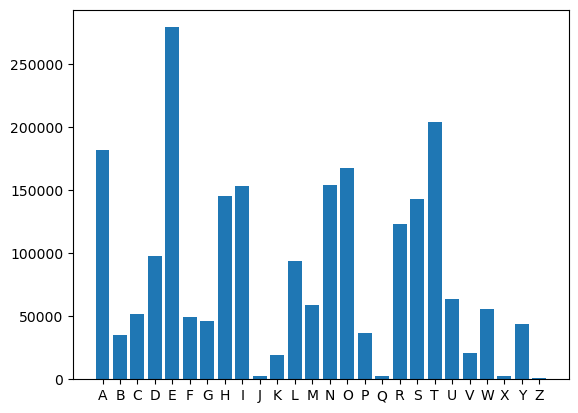

In [63]:
#### GET FREQUENCY OF LETTERS IN ENGLISH LANGUAGE ####
text = get_large_text()
counts = {chr(x):0 for x in range(65,91)}
text = text.upper()
for character in text:
    if character in counts:
        counts[character]+=1

letters = list(counts.keys())
appearances = list(counts.values())
plt.bar(range(len(counts)),appearances,tick_label=letters)

plt.show() #shows graph of letter frequencies 





In [64]:
def caesar_frequency_break():
    
    encrypted_text = open("encrypted_text.txt","r") #opens the encrypted text file to read
    cryptic = encrypted_text.read() #sets cryptic to the string value of all the text in encrypted_text.txt
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to    
  
    
    text = get_large_text()
    frequency_list = frequency_finder(text) #makes a list of the most frequent letters in english descending order
    message_most_frequent = frequency_finder(cryptic)[0] #finds the most frequent letter in the encrypted message
    
    correctness = False
    while correctness == False:
        for i in range(0,len(frequency_list)):
            decrypted_message = []
            
            shift_value = ord(message_most_frequent) - ord(frequency_list[i]) 
            #finds the shift value with corresponding letter of frequency list 
            
            for character in cryptic: #iterates each character in the cryptic text
                if character.isalpha(): #checks if character is in alphabet

                    if character.isupper(): #checks if character is uppercase
                        offset = 65 #sets appropriate offset
                    else:
                        offset = 97

                    character_offset = ord(character)-offset #offsets character to be between 0 and 25

                    decrypted_message.append(chr((character_offset-shift_value)%26+offset))
                    #appends decrypted character to decrypted message list
            print("".join(decrypted_message))
            print("")
            x = input("Does this look like plaintext? Press enter if so, type anything else if not: ")
            if x == "":
                correctness = True
                print("")
                print("Plaintext written to decrypted_text.txt")
                break
            else:
                continue
    decrypted_text.write("".join(decrypted_message))
    decrypted_text.close()
    encrypted_text.close()
    return
    
    

In [65]:
caesar_encrypt()
caesar_frequency_break()

CHAPTERLoomingsCallmeIshmaelSomeyearsagonevermindhowlongpreciselyhavinglittleornomoneyinmypurseandnothingparticulartointerestmeonshoreIthoughtIwouldsailaboutalittleandseethewaterypartoftheworldItisawayIhaveofdrivingoffthespleenandregulatingthecirculationWheneverIfindmyselfgrowinggrimaboutthemouthwheneveritisadampdrizzlyNovemberinmysoulwheneverIfindmyselfinvoluntarilypausingbeforecoffinwarehousesandbringinguptherearofeveryfuneralImeetandespeciallywhenevermyhyposgetsuchanupperhandofmethatitrequiresastrongmoralprincipletopreventmefromdeliberatelysteppingintothestreetandmethodicallyknockingpeopleshatsoffthenIaccountithightimetogettoseaassoonasIcanThisismysubstituteforpistolandballWithaphilosophicalflourishCatothrowshimselfuponhisswordIquietlytaketotheshipThereisnothingsurprisinginthisIftheybutknewitalmostallmenintheirdegreesometimeorothercherishverynearlythesamefeelingstowardstheoceanwithmeTherenowisyourinsularcityoftheManhattoesbeltedroundbywharvesasIndianislesbycoralreefscommercesurround

Does this look like plaintext? Press enter if so, type anything else if not: 

Plaintext written to decrypted_text.txt
